# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [136]:
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [137]:
def make_t_dist(sample, mu):
    t_pdf = []
    df = len(sample) - 1
    sample_std = np.std(sample)
    sample_mean = sample.mean()
    for x in sample:
        t_pdf.append((x - mu) /  (sample_std / np.sqrt(len(sample))))
    return np.array(t_pdf)


def one_sample_ttest(sample, popmean, alpha):
   
    # Population mean 
    mu = popmean

    # Sample mean (x̄) using NumPy mean()
    sample_mean = sample.mean()

    # Sample Standard Deviation (sigma) using Numpy
    sample_std = np.std(sample)
    
    # Degrees of freedom
    df = len(sample) - 1
    
    # Calculate the critical t-value
    crit_t_val = stats.t.ppf(1-alpha, df)
    
    
    # Calculate the t-value and p-value      
#     t_statistic = (sample_mean - mu) /  (sample_std / np.sqrt(len(sample)))
#     print(f'orig_t_statistic: {t_statistic}')
    t_statistic, p_value = stats.ttest_1samp(a=sample, popmean=mu)
    
    # Visualize sample distribution for normality
    ax = sns.distplot(make_t_dist(sample, mu), hist=True, bins=10)
    ax.axvline(crit_t_val, color='green', label='crit_t_val')
    ax.axvline(t_statistic, color='blue', label='t_statistic')
    ax.legend()
    
    if t_statistic > crit_t_val:
        print(f'''Null hypothesis rejected because t_stat: {t_statistic} is greater
              than the crit_t_value: {crit_t_val}, p_value: {p_value}''')
    else:
        print(f'''Failed to reject null hypothesis because t_stat: {t_statistic} is 
        not greater than the crit_t_value: {crit_t_val}, p_value: {p_value}''')
    
    # return results
    return t_statistic, crit_t_val, p_value

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

$H_{0}$ = The online courses have had no effect on the mean scores, $\bar x$ = $\mu$
$H_{1}$ = The online courses have increased the student's scores, $\bar x$ > $\mu$

For this test we'll use $\alpha$ = .05, $\mu$ = 65, sample = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

In [138]:
alpha = .05
mu = 65
sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])

Null hypothesis rejected because t_stat: 12.687592157174493 is greater
              than the crit_t_value: 1.729132811521367, p_value: 1.0053355594452825e-10


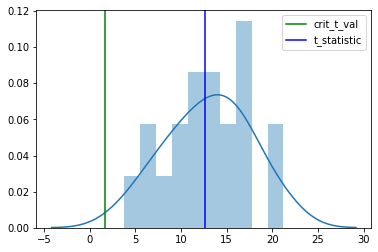

In [139]:
one_sample_ttest(sample, mu, alpha);

With the corrected value of 80.9 instead of 90.9, the t_statistic is still greater than the crit_t_value and we must reject the null hypothesis at alpha = .05.

Null hypothesis rejected because t_stat: 13.202088288314906 is greater
              than the crit_t_value: 1.729132811521367, p_value: 5.083361606682268e-11
(13.202088288314906, 1.729132811521367, 5.083361606682268e-11)


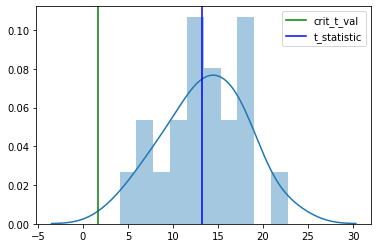

In [140]:
cor_sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
  78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])

print(one_sample_ttest(cor_sample, mu, alpha));

The effect size can be measured by comparing $\bar x$ and $\mu_{0}$.

| $\bar x$ - $\mu_{0}$ | = |81.8 - 65| = 16.8 (The population mean is 16.8 points inaccurate according to our t-test with a 95% confidence)

or

| $\bar x$ - $\mu_{0}$ | / $\mu_{0}$ = (81.8 - 65) / 65 = 16.8 / 65 = .258 (The actual population mean (sample_mean) is 25.8% larger than what we previously thought (mu) according to our t-test at 95% confidence)

| $\bar x$ - $\mu_{0}$ | / $\bar x$ = (81.8 - 65) / 81.8 = 16.8 / 81.8 = .205 (The population mean (mu) is 20.5% less than the sample mean)

or

I cannot use the probability of superiority as a measure of effect size because I don't have the population data.

or

I cannot use overlap as a measure of effect size because I don't have the population data.

## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 

# Additional notes:

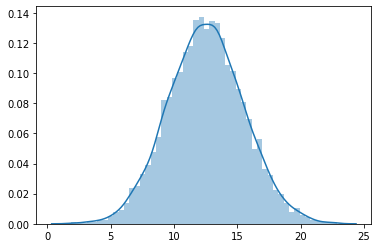

In [128]:
X = np.random.normal(loc=12.5, scale=3, size=10000)
mu = X.mean()
sns.distplot(X)

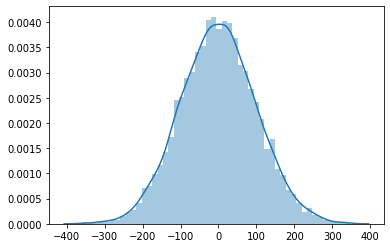

In [132]:
sns.distplot(make_t_dist(X, mu))